# Week 1

**Part 1:**

Explain in your own words: What is the the difference between the html page and the wiki-source? The html page has a lot more things to modify/play with, the wiki source is way more straight forward. The wiki source is more oriented to communicate the ideas, in a simple format, bein easier for people to write it. 


What are the various parameters you can set for a query of the wikipedia api?
Actions like query, title of the page, properties to say what we are interested in

Write your own little notebook to download wikipedia pages based on the video above. Download the source for your 4 favorite wikipedia pages.


In [1]:
import requests

def get_wikipedia_page_source(title):
    """
    Fetches the wiki-source of a Wikipedia page using the Wikipedia API.
    :param title: Title of the Wikipedia page
    :return: Raw wiki-source (wikitext) of the page
    """
    url = "https://en.wikipedia.org/w/api.php"
    params = {
        "action": "query",
        "format": "json",
        "prop": "revisions",
        "titles": title,
        "rvprop": "content",
        "rvslots": "main"
    }

    response = requests.get(url, params=params)
    data = response.json()

    pages = data.get("query", {}).get("pages", {})
    page_id, page_data = next(iter(pages.items()))
    
    if page_id == "-1":
        return f"Page '{title}' not found."

    return page_data["revisions"][0]["slots"]["main"]["*"]

# Define your 4 favorite Wikipedia pages
favorite_pages = [
    "Collado Villalba",
    "Kaydy Cain"]

# Download the source for each page
for page in favorite_pages:
    print(f"Downloading source for: {page}")
    page_source = get_wikipedia_page_source(page)
    print(page_source[:500])  # Print the first 500 characters of each page source
    print("\n" + "-" * 80 + "\n")


{{Expand Spanish|topic=geo|date=June 2012|Collado Villalba}}
{{for|the football club|CU Collado Villalba}}
{{Infobox settlement
| official_name      = Collado Villalba
| other_name         = Villalba
| native_name        = <!-- for cities whose native name is not in English -->
| nickname           = 
| motto              = 
| image_skyline      = 
| imagesize          = 
| image_caption      = 
| image_flag         = Bandera Collado Villalba.jpg
| flag_size          = 150px
| image_seal        

--------------------------------------------------------------------------------

{{Short description|Spanish singer}}
{{family name hatnote|Gómez|Carrero|lang=Spanish}}
{{Infobox musical artist
| name            = Kaydy Cain
| image           = Kaydy Cain, Seat village stage 2 (cropped).jpg
| alt             =
| caption         = Kaydy Cain performing at [[Primavera Sound]] 2019.
| birth_name      = Daniel Gómez Carrero
| alias           = Daniel Gómez Can and Kaydy Cain
| birth_date      = {

**Part 2:**

List three different real networks and state the nodes and links for each of them. 

Social media (facebook), where each user is a node and the links would be the friendships between each user.

Transport network (airline), each aiport is a node, and the links are the routes between them.

Biological network (proteins), each protein/enzyme is a node, and they interact through different processes or mechanisms as links.

Tell us of the network you are personally most interested in (a fourth one). Address the following questions:
What are its nodes and links? Neurons and Synapses 

How large is it? 86 billion neurons aprox

Can be mapped out? Yes, different neuroimaging techniques like fMRI and dMRI

Does it evolve over time? Yes, there are changes (neuroplasticity)

Are there processes occurring ON the network? (information spreading, for example) Yes, there is constant communication and many synapses and processes interact.

Why do you care about it? It is important to understand how brain works for neurological diseases. 

In your view what would be the area where network science could have the biggest impact in the next decade? Explain your answer - and base it on the text in the book.

Social networks or biological networks for targeted therapy. 

In [4]:
!pip install networkx

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.7 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.7 MB 728.2 kB/s eta 0:00:02
   ------------------ --------------------- 0.8/1.7 MB 799.2 kB/s eta 0:00:02
   ------------------------ --------------- 1.0/1.7 MB 931.8 kB/s eta 0:00:01
   ------------------------------ --------- 1.3/1.7 MB 1.0 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 1.1 MB/s eta 0:00:00


**Part 3:**

**Creating a graph**

In [7]:
import networkx as nx
G = nx.Graph() # collection of nodes which are paired by links

# add the first node
G.add_node(1)

# to speed up add at the same time several nodes, with associated attributes
G.add_nodes_from([(2,{"color":"red"}),(3,{"color":"blue"})])

# We can create graphs with default architectures as in 
H = nx.path_graph(10)
# and merge graphs 
G.add_nodes_from(H)


In [9]:
# Adding edges to the network
G.add_edge(1,2) # at a time

G.add_edges_from([(1,2),(1,3)]) # various edges at the same time

G.clear() # Remove all nodes and edges

In [10]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

**Examining elements of a graph**

In [11]:
# View status of the graph
G.number_of_nodes()
G.number_of_edges()

3

In [16]:
list(G.nodes) 
list(G.edges)
list(G.adj[1]) #adjacent or neighbors 
G.degree[1] # number of edges incident to 1

# Easier report do G.edges([]) and G.degree([])
G.edges([2, 'm'])


EdgeDataView([(2, 1), ('m', 3)])

**Removing elements from a graph**

In [ ]:
G.remove_node(2)
G.remove_nodes_from("spam")
list(G.nodes)
G.remove_edge(1, 3)
list(G)

**Graph Constructors**

In [17]:
# Specifying graph structure passed directly.
G.add_edge(1, 2)
H = nx.DiGraph(G)  # create a DiGraph using the connections from G
list(H.edges())

[(1, 2), (1, 3), (2, 1), (3, 1), (3, 'm'), ('m', 3)]

**Accessing edges and neighbors**

In [19]:
G.add_edge(1, 3)
# Set attributes of graph
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"
G.edges[1, 2]

# Examining (node, adjacency) pairs

FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
    for nbr, eattr in nbrs.items():
        wt = eattr['weight']
        if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")
            
# With edges property            
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5:
        print(f"({u}, {v}, {wt:.3})")

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)
(1, 2, 0.125)
(3, 4, 0.375)


**Graph Attributes**

In [ ]:
G = nx.Graph(day="Friday") # Assign attributes when creating graph
G.graph
G.graph['day'] = "Monday"

# add node attributes
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]

# edge attributes
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2

**Multigraphs**

In [20]:
# put more than one edge between two nodes

MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
dict(MG.degree(weight='weight'))

{1: 1.25, 2: 1.75, 3: 0.5}

**Drawing Graphs**

In [24]:
!pip install matplotlib 

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.8 MB 1.7 MB/s eta 0:00:05
   ----- ---------------------------------- 1.0/7.8 MB 1.7 MB/s eta 0:00:04
   -------- ------------------------------- 1.6/7.8 MB 2.0 MB/s eta 0:00:04
   --------- ------------------------------ 1.8/7.8 MB 2.0 MB/s eta 0:00:04
   ---------- ----------------------------- 2.1/7.8 MB 1.8 MB/s eta 0:00:04
   ------------ --------------------------- 2.4/7.8 MB 1.8 MB/s eta 0:00:04
   -------------- ------------------------- 2.9/7.8 MB 1.7 MB/s eta 0:00:03
   ---------------- ----------------------- 3.1/7.8 MB 1.7 MB/s eta 0:00:03
   ----------------- ---------------------- 3.4/7.8 MB 1.6 MB/s eta 0:00:03
   ------------------ --------------------- 3.7/7.8 MB 1.6 MB/s eta 0:00:03
   -------------------- ------------------- 3.9/7.8 MB 1.6 MB/s eta 0:00:03
   ---------------------- 

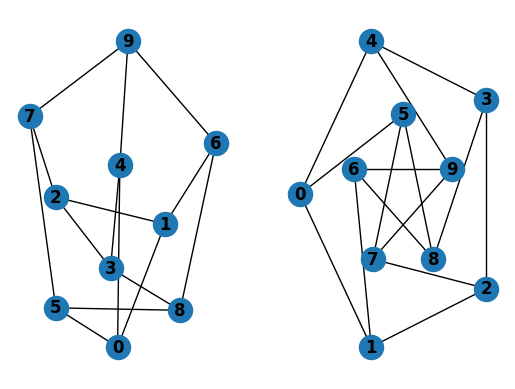

In [25]:
import matplotlib.pyplot as plt

G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

**Graph Analysis**

In [ ]:
# We can analyze the structure of 